# Linear Regression (one feature)
This is a machine learning algorithm that takes in input data that has one feature and each feature has one output, and uses the data to train a model that could be used to predict the outcome of new data entered. An example of a dataset would be house land area and how much it costs.

## Notation
$ m = $ number of data entries (training examples)\

$ x = $ an input  

$ x^{(i)} $ the i th training example input/feature  

$ y^{(i)} $ the i th training example ouput

## Dataset
I used a dataset I found in a course for linear regression as it was small and had a clear corrolation which makes it easier to see if the program is working. The dataset is imported and plotted on a scatterplot.

In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
a = open("data.csv")
b = [row for row in csv.reader(a)]
c = [[b[i][-1]] for i in range(len(b))]
for i in range(len(b)):
    del b[i][-1]

X = np.array(b, dtype=np.float32)
y = np.array(c, dtype=np.float32)

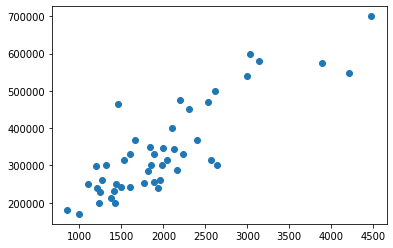

In [3]:
plt.scatter(X, y)
plt.show()

The dataset has a clear corolation and the goal is to make a model that can when plotted as a straight line it fits as best as possible to the scatterplot of data. 

The data needs feature scaling applied as it will make the training process much quicker and not overflow as sometimes values can get too big for the computer to handle. Feature scaling reduces the range of each column of data, in this case I used a very simple technique where the value of the inputs gets divide by the value of the greatest input and same concept with the ouputs. This is by far not the best method as will be shown later. In this case the values will be between 0 and 1.

In [4]:
X = np.array(b, dtype=np.float32)
X_max = np.max(X)
X /= X_max
y = np.array(c, dtype=np.float32)
y_max = np.max(y)
y /= y_max

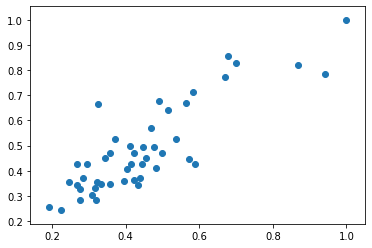

In [5]:
plt.scatter(X, y)
plt.show()

## Prediction
The machine uses a function called the hypothesis to predict. The hypothesis function in this case is linear meaning that if it were plotted it would draw a straight line throught the data.
$$
h_{\theta}(x) = \theta_0 + \theta_1 x
$$
This equation can be compared with $ y = mx + c $ except the parameters are $ \theta_0 $ for c and $ \theta_1 $  for m and x is just an input.\
The code also takes into consideration the feature scaling, but initialy the parameters are chosen randomly.

In [6]:
theta = np.random.standard_normal((1, 2))

In [8]:
def hypothesis(data_in):
    data_in /= np.max(X)
    pred = theta[0][0] + (theta[0][1] * data_in)
    return pred * np.max(y)

Then I make a funtion that can plot the hypothesis which will not fit the data at all since the model has not been trained.

In [9]:
def line(Xs, ys):
    x_plot = np.linspace(np.min(Xs), np.max(Xs), num=len(Xs))
    y_plot = []
    for i in x_plot:
        p = hypothesis(i)
        y_plot.insert(-1, p)
    x_plot = np.delete(x_plot, len(x_plot) - 1)
    del y_plot[-1]
    plt.plot(x_plot, y_plot)

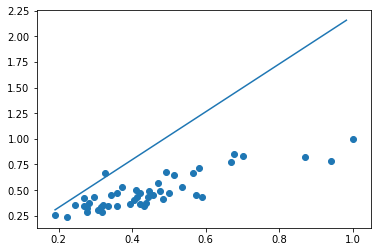

In [13]:
plt.scatter(X, y)
line(X, y)
plt.show()